# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [11]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from typing import Union, List, Tuple

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [12]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
186 µs ± 100 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 143.86 MiB, increment: 0.10 MiB


SIZE:  1000
Timing: 
18.2 ms ± 625 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 166.77 MiB, increment: 22.90 MiB


SIZE:  10000
Timing: 
1.75 s ± 34.3 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 2155.34 MiB, increment: 2011.43 MiB




***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

In [13]:
#rozwiazanie
def absolut_error(v: Union[int, float, List, np.ndarray], v_aprox: Union[int, float, List, np.ndarray]) -> Union[int, float, np.ndarray]:
    """Obliczenie błędu bezwzględnego.
    Funkcja powinna działać zarówno na wartościach skalarnych, listach jak i wektorach/macierzach biblioteki numpy.

    Parameters:
    v (Union[int, float, List, np.ndarray]): wartość dokładna
    v_aprox (Union[int, float, List, np.ndarray]): wartość przybliżona

    Returns:
    err Union[int, float, np.ndarray]: wartość błędu bezwzględnego,
                                       NaN w przypadku błędnych danych wejściowych
    """
    if not isinstance(v,(int,float,List,np.ndarray)) or not isinstance(v_aprox,(int,float,List,np.ndarray)):
        return np.NaN
    if isinstance(v,(List,np.ndarray)) and isinstance(v_aprox,(List,np.ndarray)) and len(v) != len(v_aprox):
        return np.NaN

    abs_err = abs(np.array(v_aprox) - np.array(v))
    return abs_err

def relative_error(v: Union[int, float, List, np.ndarray], v_aprox: Union[int, float, List, np.ndarray]) -> Union[int, float, np.ndarray]:
    """Obliczenie błędu względnego.
    Funkcja powinna działać zarówno na wartościach skalarnych, listach jak i wektorach/macierzach biblioteki numpy.

    Parameters:
    v (Union[int, float, List, np.ndarray]): wartość dokładna
    v_aprox (Union[int, float, List, np.ndarray]): wartość przybliżona

    Returns:
    err Union[int, float, np.ndarray]: wartość błędu względnego,
                                       NaN w przypadku błędnych danych wejściowych
    """
    if not isinstance(v, (int, float, List, np.ndarray)) or not isinstance(v_aprox, (int, float, List, np.ndarray)):
        return np.NaN
    if isinstance(v, (List, np.ndarray)) and isinstance(v_aprox, (List, np.ndarray)) and len(v) != len(v_aprox):
        return np.NaN
    if 0 in np.array(v):
        return np.NaN

    rel_error = abs(np.array(v_aprox) - np.array(v))/abs(np.array(v))
    return rel_error


***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  

In [15]:
#rozwiazanie
def p_diff(n: int, c: float) -> float:
    """Funkcja wylicza wartości wyrażeń P1 i P2 w zależności od n i c.
    Następnie zwraca wartość bezwzględną z ich różnicy.
    Szczegóły w Zadaniu 2.

    Parameters:
    n Union[int]:
    c Union[int, float]:

    Returns:
    diff float: różnica P1-P2
                NaN w przypadku błędnych danych wejściowych
    """
    if not isinstance(n, int) or not isinstance(c, (int, float)):
        return np.NaN

    p1 = 2 ** n - 2 ** n + c
    p2 = 2 ** n + c - 2 ** n
    diff = abs(p1 - p2)
    return diff

    1. Intuicja podpowiada, że w każdym przypadku powinniśmy otrzymać zero,
       tak się jednak nie dzieje - dla niektórych przypadków wyniki są niezerowe.
    2. Skończoną reprezentację mają liczby które są potęgami liczby 2.
    3. Różnica wynika ze skończonej dokładności reprezentacji liczb zmiennoprzecinkowych
       przez komputer
    4. Błąd zaokrąglenia
    5. Błąd zaokrąglenia można zmniejszyć umiejętnie ustalając sposób i kolejność wykonywanych działań.

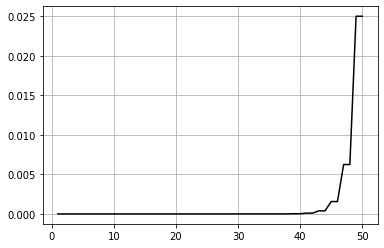

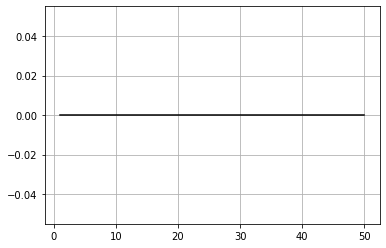

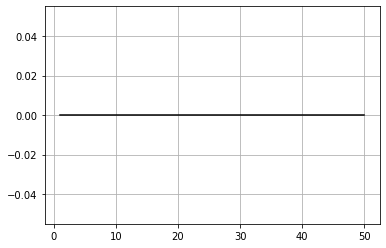

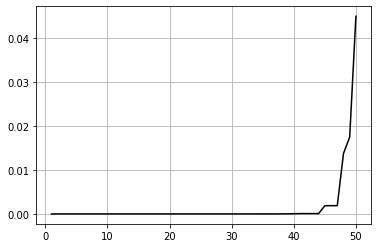

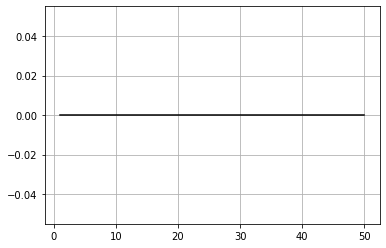

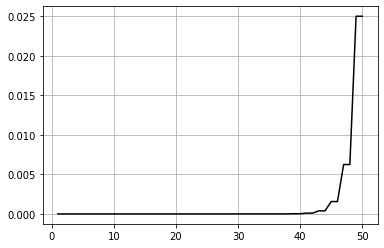

In [16]:
c = [0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
n = np.arange(1,51)

for elem in c:
    y = np.array([])
    for n_vec in range(50):
        y = np.append(y, main.p_diff(n_vec,elem))
    plt.plot(n, y, color = "black")
    plt.grid()
    plt.show()

***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

In [17]:
def exponential(x: Union[int, float], n: int) -> float:
    """Funkcja znajdująca przybliżenie funkcji exp(x).
    Do obliczania silni można użyć funkcji scipy.math.factorial(x)
    Szczegóły w Zadaniu 3.

    Parameters:
    x Union[int, float]: wykładnik funkcji ekspotencjalnej
    n Union[int]: liczba wyrazów w ciągu

    Returns:
    exp_aprox float: aproksymowana wartość funkcji,
                     NaN w przypadku błędnych danych wejściowych
    """
    if not isinstance(n,int) or n < 0:
        return np.NaN
    if not isinstance(x,(int,float)):
        return np.NaN
    result = 0.0
    for iter in range(n):
        result += (x**iter)/scipy.math.factorial(iter)
    return result

W przykładzie występuje błąd obcięcia.

Przykładowe błędy bezwzględne i względne dla

n= 1:35, exp = 20

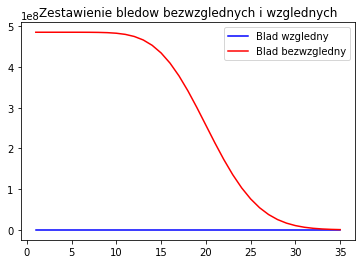

In [18]:
n = np.arange(1,36)
xp = 20
y_abs = np.array([])
y_rel = np.array([])
for elem in range(1,36):
    y_rel = np.append(y_rel, main.relative_error(np.exp(xp),main.exponential(xp,elem)))
    y_abs = np.append(y_abs, main.absolut_error(np.exp(xp),main.exponential(xp,elem)))
plt.plot(n, y_rel, color = 'blue')
plt.plot(n, y_abs, color = 'red')
plt.legend(["Blad wzgledny", "Blad bezwzgledny"])
plt.title("Zestawienie bledow bezwzglednych i wzglednych")

plt.show()

***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [19]:
#rozwiazanie
def coskx2(k: int, x: Union[int, float]) -> Tuple[float, float]:
    """Funkcja znajdująca przybliżenie funkcji cos(kx). Metoda 2.
    Szczegóły w Zadaniu 4.

    Parameters:
    x Union[int, float]:
    k Union[int]:

    Returns:
    coskx, sinkx float: aproksymowana wartość funkcji,
                        NaN w przypadku błędnych danych wejściowych
    """
    if k == 1:
        return np.cos(x), np.sin(x)
    elif k == 0:
        return 1, 0
    elif x == 0:
        return 1, 0
    elif not isinstance(k, int) or k < 0:
        return np.NaN
    elif not isinstance(x, (int, float)):
        return np.NaN
    elif k > 0:
        return np.cos(x) * coskx2(k - 1, x)[0] - np.sin(x) * coskx2(k - 1, x)[1],\
               np.sin(x) * coskx2(k - 1, x)[0] + np.cos(x) * coskx2(k - 1, x)[1]

***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

In [20]:
#rozwiazanie

def pi(n: int) -> float:
    """Funkcja znajdująca przybliżenie wartości stałej pi.
    Szczegóły w Zadaniu 5.

    Parameters:
    n Union[int, List[int], np.ndarray[int]]: liczba wyrazów w ciągu

    Returns:
    pi_aprox float: przybliżenie stałej pi,
                    NaN w przypadku błędnych danych wejściowych
    """
    if not isinstance(n,int) or n <= 0:
        return np.NaN
    pi_approx = 0.0

    for iter in range(1,n+1):
        pi_approx += 6/(iter**2)
    return np.sqrt(pi_approx)

1. Do czynienia mamy z błędami zaokrąglenia przy wykonywaniu pierwiastkowania, oraz błędy obcięcia - n nie jest nieskończone.
2.

Text(0.5, 1.0, 'Analiza bledow bezwzglednych i wzglednych')

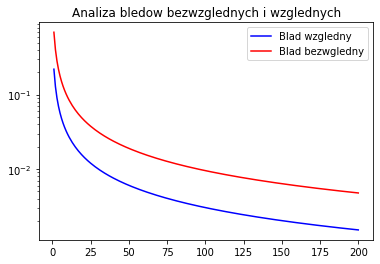

In [21]:
n = np.arange(1,201)
y_rel = np.array([])
y_abs = np.array([])

for elem in range(1,201):
    y_rel = np.append(y_rel, main.relative_error(np.pi, main.pi(elem)))
    y_abs = np.append(y_abs, main.absolut_error(np.pi, main.pi(elem)))
plt.semilogy(n, y_rel, color = "blue")
plt.semilogy(n, y_abs, color = "red")
plt.legend(["Blad wzgledny", "Blad bezwgledny"])
plt.title("Analiza bledow bezwzglednych i wzglednych")

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

229 ns ± 152 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)
1.06 µs ± 100 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)
1.35 µs ± 205 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)
2.43 µs ± 1.2 µs per loop (mean ± std. dev. of 10 runs, 50 loops each)
1.66 µs ± 44.4 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)
1.93 µs ± 247 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)
2.11 µs ± 179 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)
2.46 µs ± 445 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)
2.57 µs ± 372 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)
2.74 µs ± 348 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)
2.84 µs ± 31.5 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)
3.16 µs ± 254 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)
3.33 µs ± 308 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)
5.35 µs ± 1.76 µs per loop (mean ± std. dev. of 10 runs, 50 loops each)
3.77

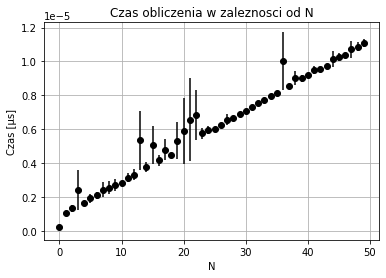

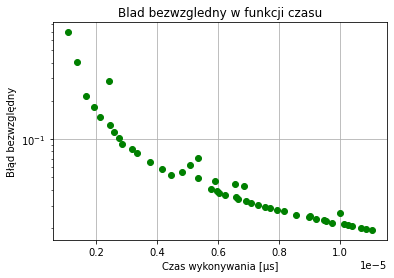

In [25]:
time = np.zeros(50)
dev = np.zeros(50)
y = np.arange(0,50,1)
error = np.zeros(50)

for i in range(50):
    exec_timeit = %timeit -r 10 -n 50 -o main.pi(i)
    time[i] = exec_timeit.average
    dev[i] = exec_timeit.stdev
    error[i] = main.absolut_error(np.pi, main.pi(i))

plt.errorbar(y, time, yerr=dev, ls="none", marker="o", color = 'black')
plt.title("Czas obliczenia w zaleznosci od N")
plt.xlabel("N")
plt.ylabel("Czas [µs]")
plt.grid()
plt.show()

plt.semilogy(time, error, "o", color = 'green')
plt.title("Blad bezwzgledny w funkcji czasu")
plt.xlabel("Czas wykonywania [µs]")
plt.ylabel("Błąd bezwzględny")
plt.grid()
plt.show()


Wykonane zadania zwróciły uwagę na istotność uwzględniania błędów obcięcia i zaokrąglenia oraz możliwości ich minimalizacji.
Niestety błędy numeryczne są nieodłączną częścią wykonywanych przez komputer operacji - ze względu na skończone zasoby.
